In [ ]:
# Final Project No.:02 E-commerce customer churn

In [9]:
# 📌 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plots
%matplotlib inline


In [10]:
# 📌 Step 2: Load dataset
df = pd.read_excel("E Commerce Dataset.xlsx")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (5630, 20)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [11]:
# 📌 Step 3: Data Info
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500


In [13]:
# 📌 Step 4: Handle missing values
print(df.isnull().sum())
df = df.dropna(how='all')  # drop rows with all NaN
df.fillna(0, inplace=True)  # fill remaining missing with 0 (modify if needed)


CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [14]:
Totrla_User = df['CustomerID'].nunique()

In [15]:
total_users = df['CustomerID'].nunique()
print("✅ Total Users:", total_users)


✅ Total Users: 5630


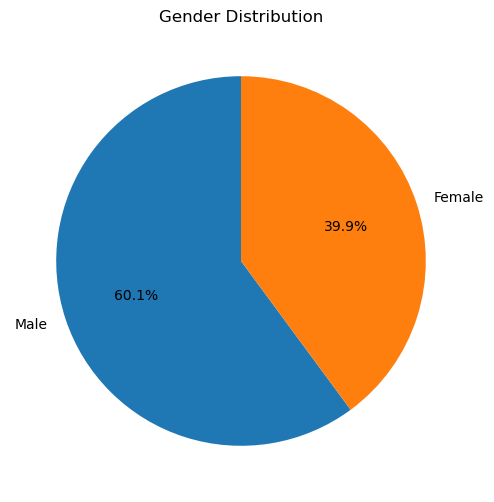

In [16]:
if 'Gender' in df.columns:
    gender_counts = df['Gender'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title("Gender Distribution")
    plt.show()


C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_8920\794076692.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="coolwarm")


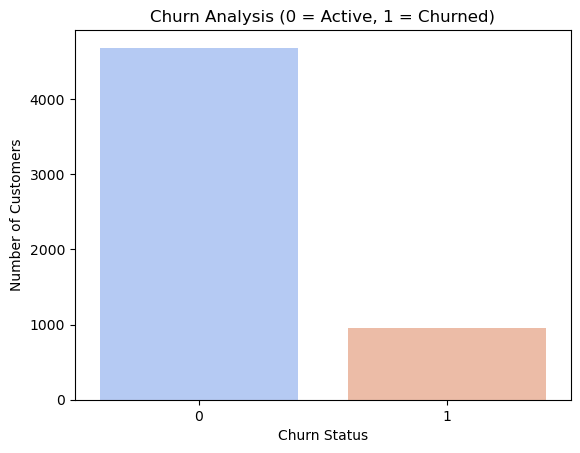

In [17]:
if 'Churn' in df.columns:
    churn_counts = df['Churn'].value_counts()
    sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="coolwarm")
    plt.title("Churn Analysis (0 = Active, 1 = Churned)")
    plt.xlabel("Churn Status")
    plt.ylabel("Number of Customers")
    plt.show()


C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_8920\1330770978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='HourSpendOnApp', data=df, palette="Set2")


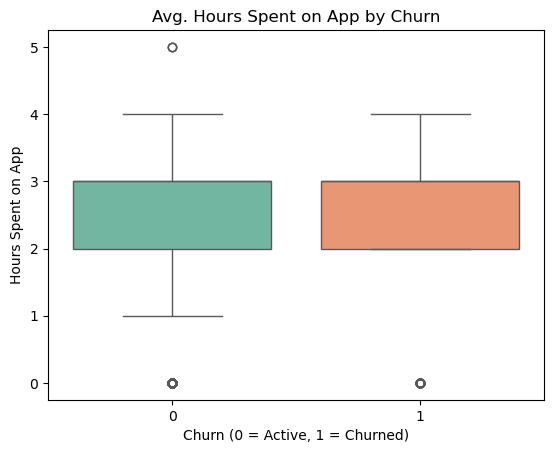

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'HourSpendOnApp' in df.columns and 'Churn' in df.columns:
    sns.boxplot(x='Churn', y='HourSpendOnApp', data=df, palette="Set2")
    plt.title("Avg. Hours Spent on App by Churn")
    plt.xlabel("Churn (0 = Active, 1 = Churned)")
    plt.ylabel("Hours Spent on App")
    plt.show()


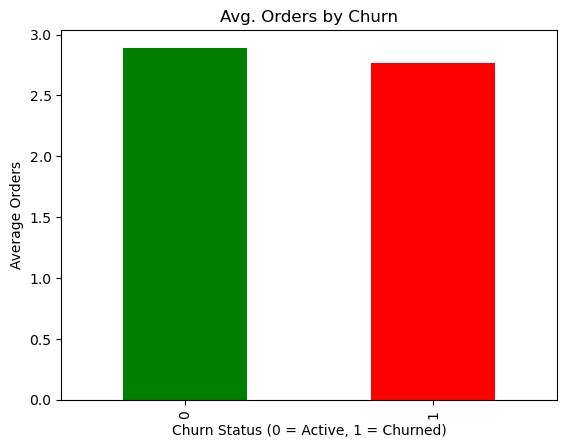

In [21]:
import matplotlib.pyplot as plt

if 'OrderCount' in df.columns and 'Churn' in df.columns:
    purchase_churn = df.groupby('Churn')['OrderCount'].mean()
    purchase_churn.plot(kind="bar", color=['green','red'])
    plt.title("Avg. Orders by Churn")
    plt.xlabel("Churn Status (0 = Active, 1 = Churned)")
    plt.ylabel("Average Orders")
    plt.show()


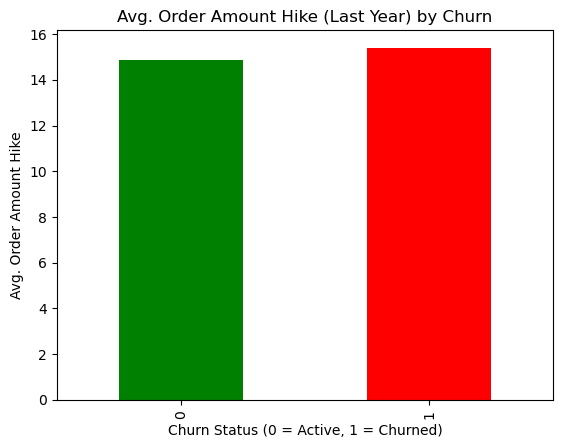

In [23]:
import matplotlib.pyplot as plt

if 'OrderAmountHikeFromlastYear' in df.columns and 'Churn' in df.columns:
    hike_churn = df.groupby('Churn')['OrderAmountHikeFromlastYear'].mean()
    hike_churn.plot(kind="bar", color=['green','red'])
    plt.title("Avg. Order Amount Hike (Last Year) by Churn")
    plt.xlabel("Churn Status (0 = Active, 1 = Churned)")
    plt.ylabel("Avg. Order Amount Hike")
    plt.show()


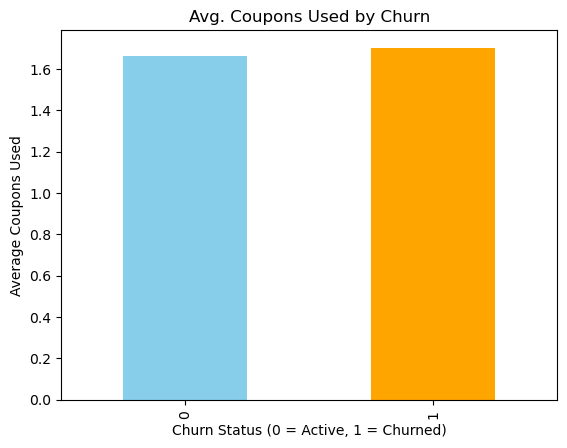

In [24]:
import matplotlib.pyplot as plt

if 'CouponUsed' in df.columns and 'Churn' in df.columns:
    coupon_churn = df.groupby('Churn')['CouponUsed'].mean()
    coupon_churn.plot(kind="bar", color=['skyblue','orange'])
    plt.title("Avg. Coupons Used by Churn")
    plt.xlabel("Churn Status (0 = Active, 1 = Churned)")
    plt.ylabel("Average Coupons Used")
    plt.show()


In [25]:
if 'Device' in df.columns:
    device_counts = df['Device'].value_counts()
    sns.barplot(x=device_counts.index, y=device_counts.values, palette="viridis")
    plt.title("Website Activity by Devices")
    plt.xlabel("Device Type")
    plt.ylabel("Users")
    plt.show()


C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_8920\1701127809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts.index, y=device_counts.values, palette="viridis")


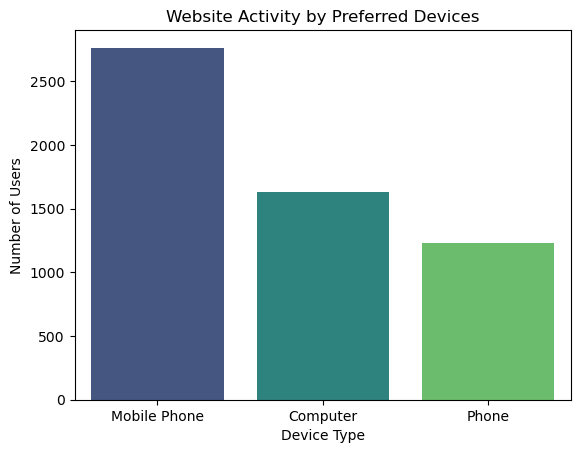

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'PreferredLoginDevice' in df.columns:
    device_counts = df['PreferredLoginDevice'].value_counts()
    sns.barplot(x=device_counts.index, y=device_counts.values, palette="viridis")
    plt.title("Website Activity by Preferred Devices")
    plt.xlabel("Device Type")
    plt.ylabel("Number of Users")
    plt.show()
else:
    print("⚠️ Device column not found in dataset.")


C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_8920\342248320.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tenure', data=df, palette="Set1")


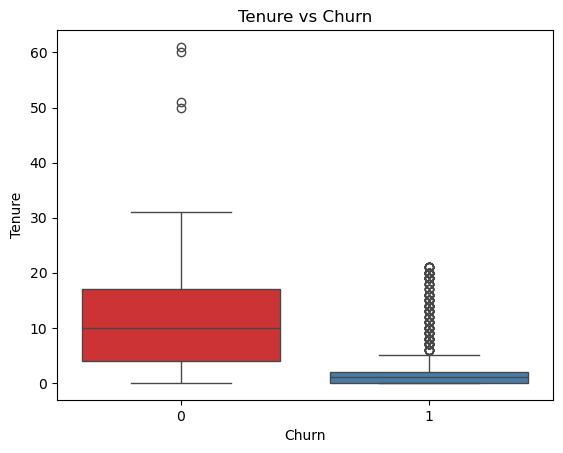

In [27]:
sns.boxplot(x='Churn', y='Tenure', data=df, palette="Set1")
plt.title("Tenure vs Churn")
plt.show()


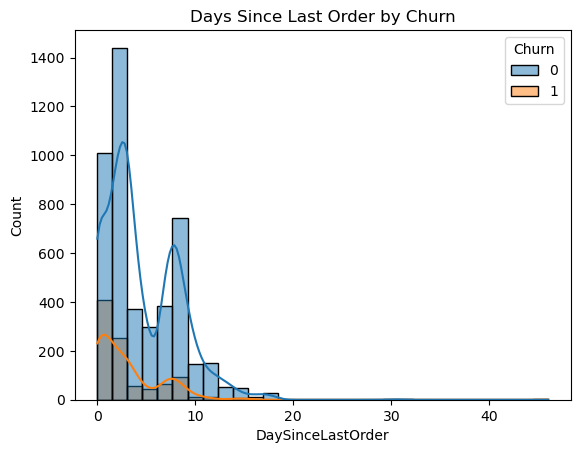

In [28]:
sns.histplot(data=df, x='DaySinceLastOrder', hue='Churn', bins=30, kde=True)
plt.title("Days Since Last Order by Churn")
plt.show()


C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_8920\4137454707.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='HourSpendOnApp', data=df, palette="coolwarm")


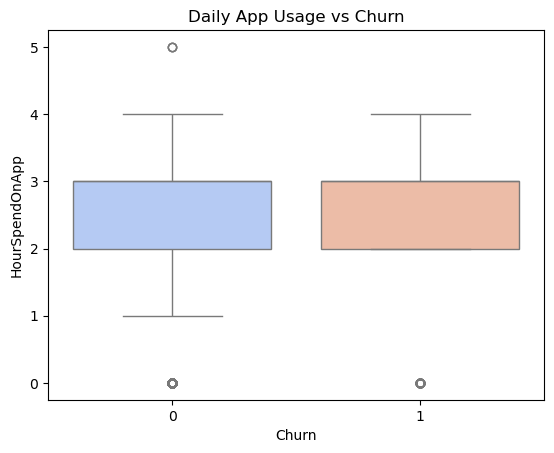

In [29]:
sns.boxplot(x='Churn', y='HourSpendOnApp', data=df, palette="coolwarm")
plt.title("Daily App Usage vs Churn")
plt.show()


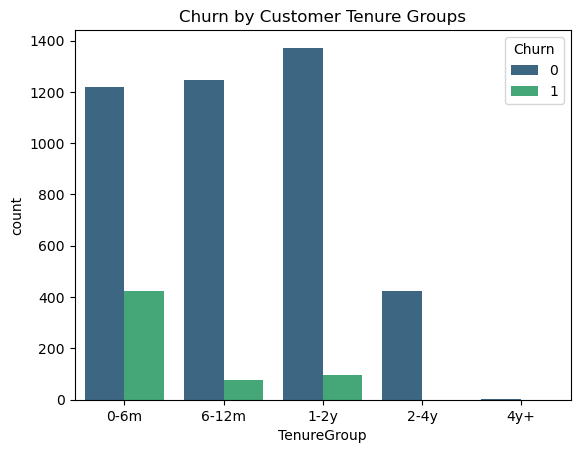

In [30]:
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0,6,12,24,48,100], 
                           labels=['0-6m','6-12m','1-2y','2-4y','4y+'])

sns.countplot(x='TenureGroup', hue='Churn', data=df, palette="viridis")
plt.title("Churn by Customer Tenure Groups")
plt.show()


C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_8920\1934663080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TenureGroup', y='OrderCount', data=df, palette="magma")


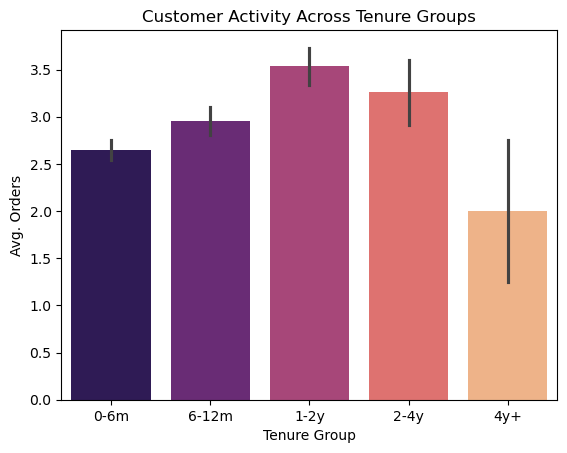

In [32]:
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0,6,12,24,48,100],
                           labels=['0-6m','6-12m','1-2y','2-4y','4y+'])

sns.barplot(x='TenureGroup', y='OrderCount', data=df, palette="magma")
plt.title("Customer Activity Across Tenure Groups")
plt.xlabel("Tenure Group")
plt.ylabel("Avg. Orders")
plt.show()


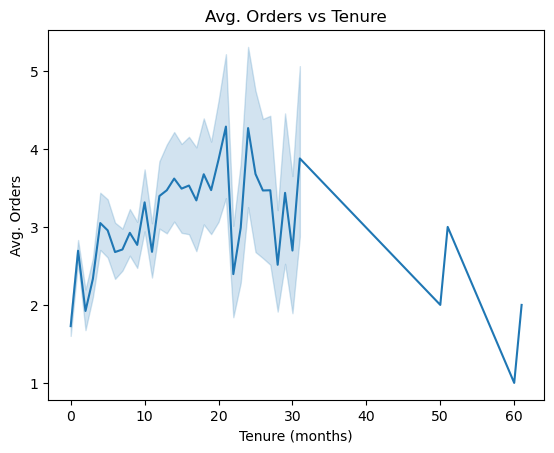

In [33]:
sns.lineplot(x='Tenure', y='OrderCount', data=df, estimator='mean')
plt.title("Avg. Orders vs Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Avg. Orders")
plt.show()


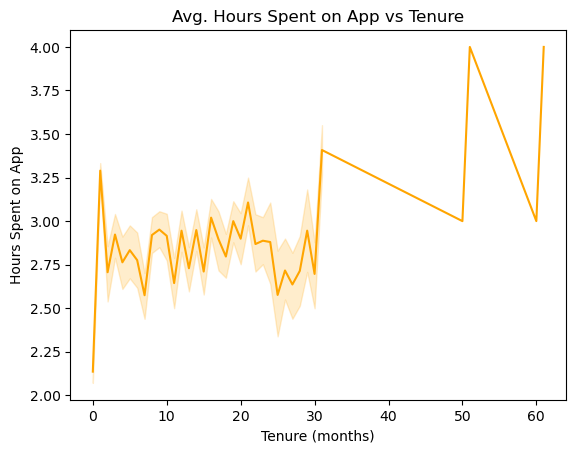

In [34]:
sns.lineplot(x='Tenure', y='HourSpendOnApp', data=df, estimator='mean', color='orange')
plt.title("Avg. Hours Spent on App vs Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Hours Spent on App")
plt.show()


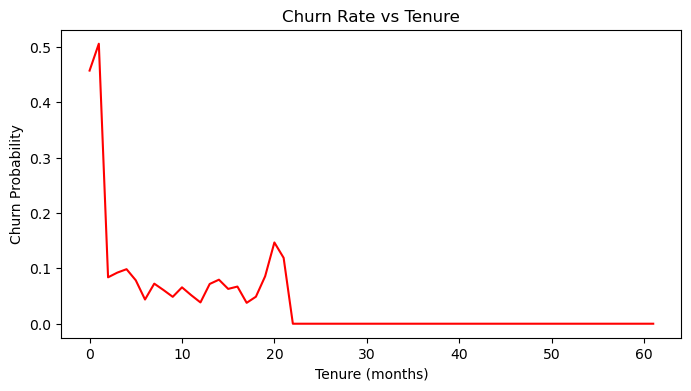

In [35]:
churn_by_tenure = df.groupby('Tenure')['Churn'].mean()
churn_by_tenure.plot(kind='line', figsize=(8,4), color='red')
plt.title("Churn Rate vs Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Churn Probability")
plt.show()


C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_8920\2934695028.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='HourSpendOnApp', data=df, palette="Set2")


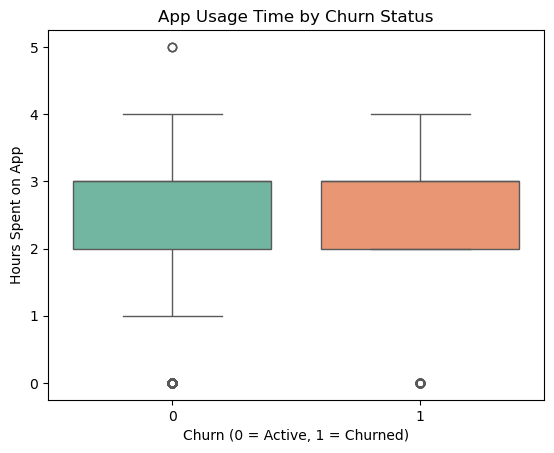

In [36]:
sns.boxplot(x='Churn', y='HourSpendOnApp', data=df, palette="Set2")
plt.title("App Usage Time by Churn Status")
plt.xlabel("Churn (0 = Active, 1 = Churned)")
plt.ylabel("Hours Spent on App")
plt.show()


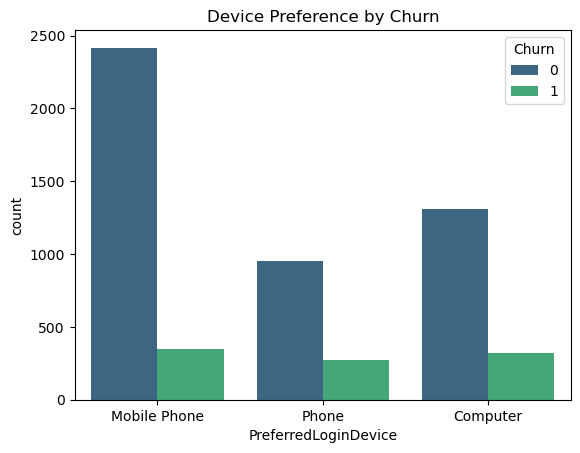

In [37]:
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=df, palette="viridis")
plt.title("Device Preference by Churn")
plt.show()


C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_8920\929894868.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=df, palette="coolwarm")


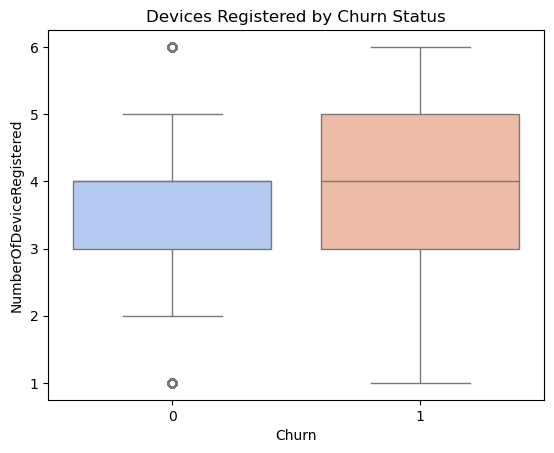

In [38]:
sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=df, palette="coolwarm")
plt.title("Devices Registered by Churn Status")
plt.show()


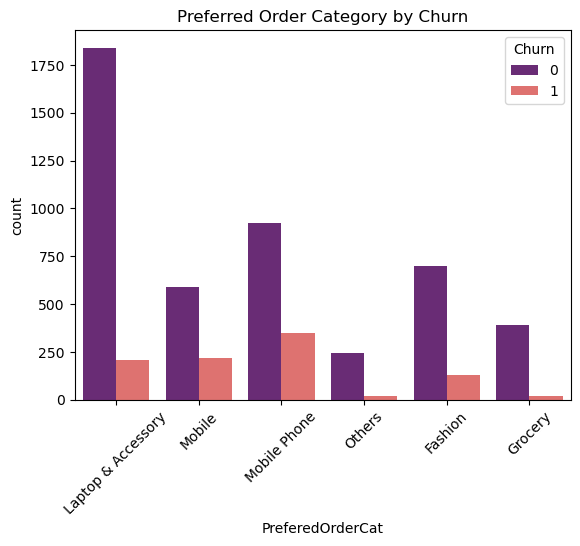

In [39]:
sns.countplot(x='PreferedOrderCat', hue='Churn', data=df, palette="magma")
plt.title("Preferred Order Category by Churn")
plt.xticks(rotation=45)
plt.show()


C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_8920\4011464227.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df, palette="Set1")


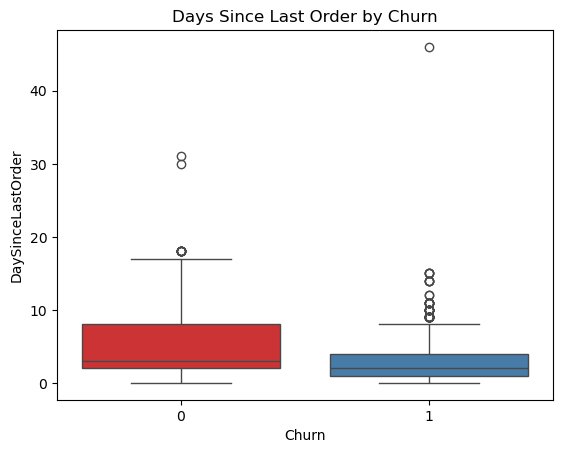

In [40]:
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df, palette="Set1")
plt.title("Days Since Last Order by Churn")
plt.show()


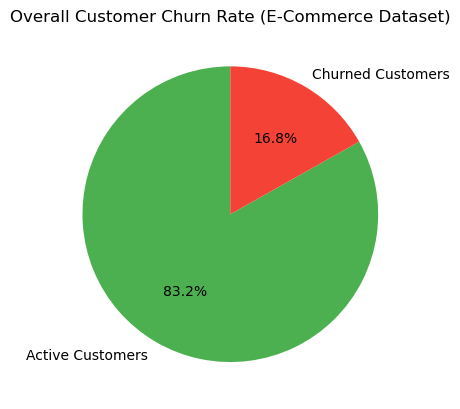

In [43]:
import matplotlib.pyplot as plt

# Active (Churn=0) vs Churned (Churn=1) direct from dataset
active_customers = df[df['Churn'] == 0]['CustomerID'].nunique()
churned_customers = df[df['Churn'] == 1]['CustomerID'].nunique()

labels = ['Active Customers', 'Churned Customers']
sizes = [active_customers, churned_customers]
colors = ['#4CAF50', '#F44336']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Overall Customer Churn Rate (E-Commerce Dataset)")
plt.show()


C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_8920\1932588526.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='HourSpendOnApp', data=df, palette="Set2")


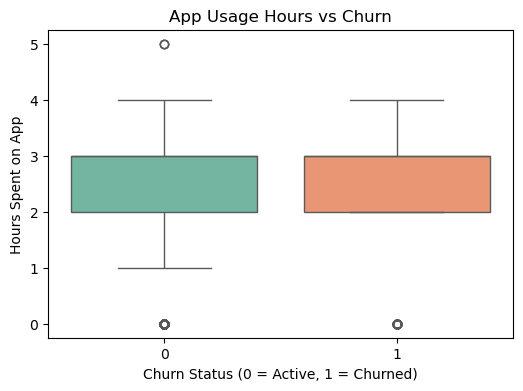

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='HourSpendOnApp', data=df, palette="Set2")
plt.title("App Usage Hours vs Churn")
plt.xlabel("Churn Status (0 = Active, 1 = Churned)")
plt.ylabel("Hours Spent on App")
plt.show()


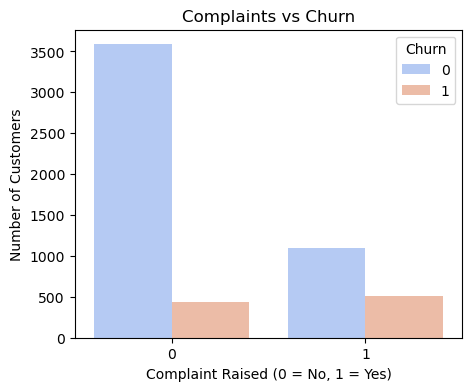

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x='Complain', hue='Churn', data=df, palette="coolwarm")
plt.title("Complaints vs Churn")
plt.xlabel("Complaint Raised (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()


C:\Users\Pushkar Kumar\AppData\Local\Temp\ipykernel_8920\2418912446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='SatisfactionScore', data=df, palette="Set2")


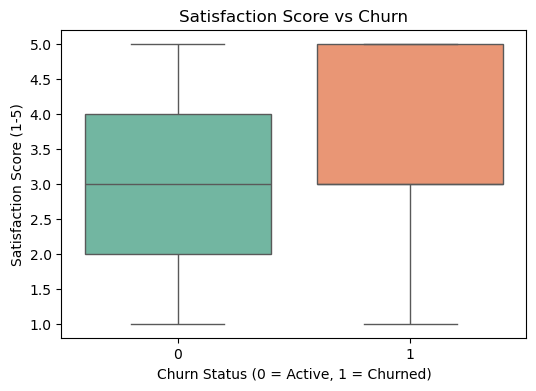

In [46]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='SatisfactionScore', data=df, palette="Set2")
plt.title("Satisfaction Score vs Churn")
plt.xlabel("Churn Status (0 = Active, 1 = Churned)")
plt.ylabel("Satisfaction Score (1-5)")
plt.show()


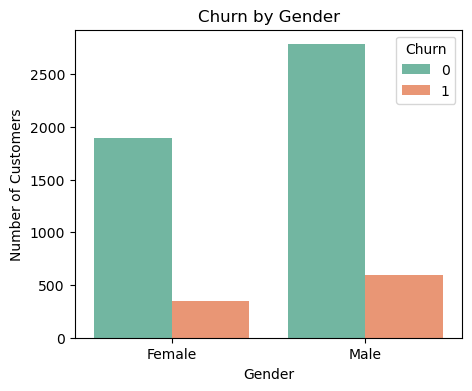

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x='Gender', hue='Churn', data=df, palette="Set2")
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()


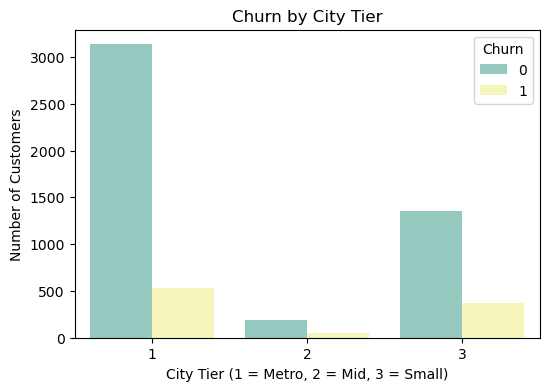

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x='CityTier', hue='Churn', data=df, palette="Set3")
plt.title("Churn by City Tier")
plt.xlabel("City Tier (1 = Metro, 2 = Mid, 3 = Small)")
plt.ylabel("Number of Customers")
plt.show()


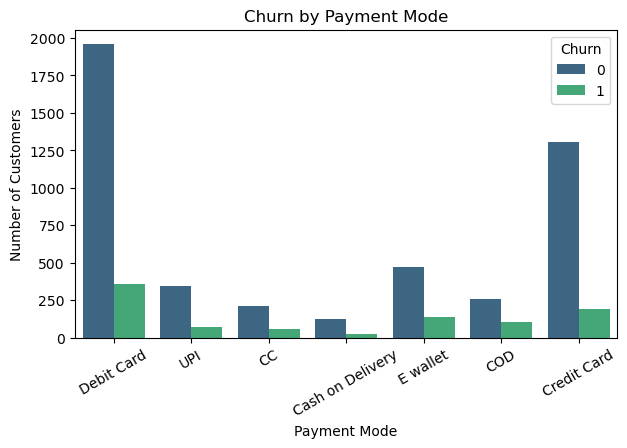

In [49]:
plt.figure(figsize=(7,4))
sns.countplot(x='PreferredPaymentMode', hue='Churn', data=df, palette="viridis")
plt.title("Churn by Payment Mode")
plt.xlabel("Payment Mode")
plt.ylabel("Number of Customers")
plt.xticks(rotation=30)
plt.show()
